<a href="https://colab.research.google.com/github/TheCaveOfAdullam/study3/blob/main/%ED%99%94%ED%95%99%EB%AC%BC%EC%A7%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
%matplotlib inline

In [14]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 126125 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [17]:
# 음수 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

In [18]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

In [19]:
# CSV 파일 로드 (인코딩 CP949)
file_path = '/content/drive/MyDrive/화관법/화학물질위해관리계획서작성대상사업장현황.csv'
df = pd.read_csv(file_path, encoding='cp949')

In [20]:
# 1. 시군별 사업장 수 시각화
def plot_sites_by_region(df):
    plt.figure(figsize=(12, 6))
    order = df['시군명'].value_counts().index
    sns.countplot(data=df, y='시군명', order=order, palette='Blues_d')
    plt.title('시군별 사업장 수')
    plt.xlabel('사업장 수')
    plt.ylabel('시군명')
    plt.tight_layout()
    plt.show()

In [21]:
# 2. 사고대비 화학물질별 사업장 수 시각화 (Top 10)
def plot_top_chemicals(df):
    top_chemicals = df['취급사고대비물질명'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_chemicals.values, y=top_chemicals.index, palette='Reds_d')
    plt.title('상위 10개 사고대비 화학물질별 사업장 수')
    plt.xlabel('사업장 수')
    plt.ylabel('화학물질명')
    plt.tight_layout()
    plt.show()

In [22]:
# 3. 주민대피시설 거리 히스토그램
def plot_shelter_distance(df):
    plt.figure(figsize=(10, 5))
    sns.histplot(df['주민대피시설거리(m)'].dropna(), bins=30, kde=True, color='green')
    plt.title('사업장과 주민대피시설 간 거리 분포')
    plt.xlabel('거리 (m)')
    plt.ylabel('사업장 수')
    plt.tight_layout()
    plt.show()

In [23]:
# 4. 위도/경도 산점도 (지도 시각화 대체용)
def plot_map_scatter(df):
    df_geo = df.dropna(subset=['정제WGS84위도', '정제WGS84경도'])
    plt.figure(figsize=(8, 8))
    sns.scatterplot(
        x='정제WGS84경도',
        y='정제WGS84위도',
        data=df_geo,
        hue='시군명',
        legend=False,
        s=50,
        alpha=0.7
    )
    plt.title('사업장 위치 분포 (경도 vs 위도)')
    plt.xlabel('경도')
    plt.ylabel('위도')
    plt.tight_layout()
    plt.show()

<ipython-input-20-96c899a8d5e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='시군명', order=order, palette='Blues_d')


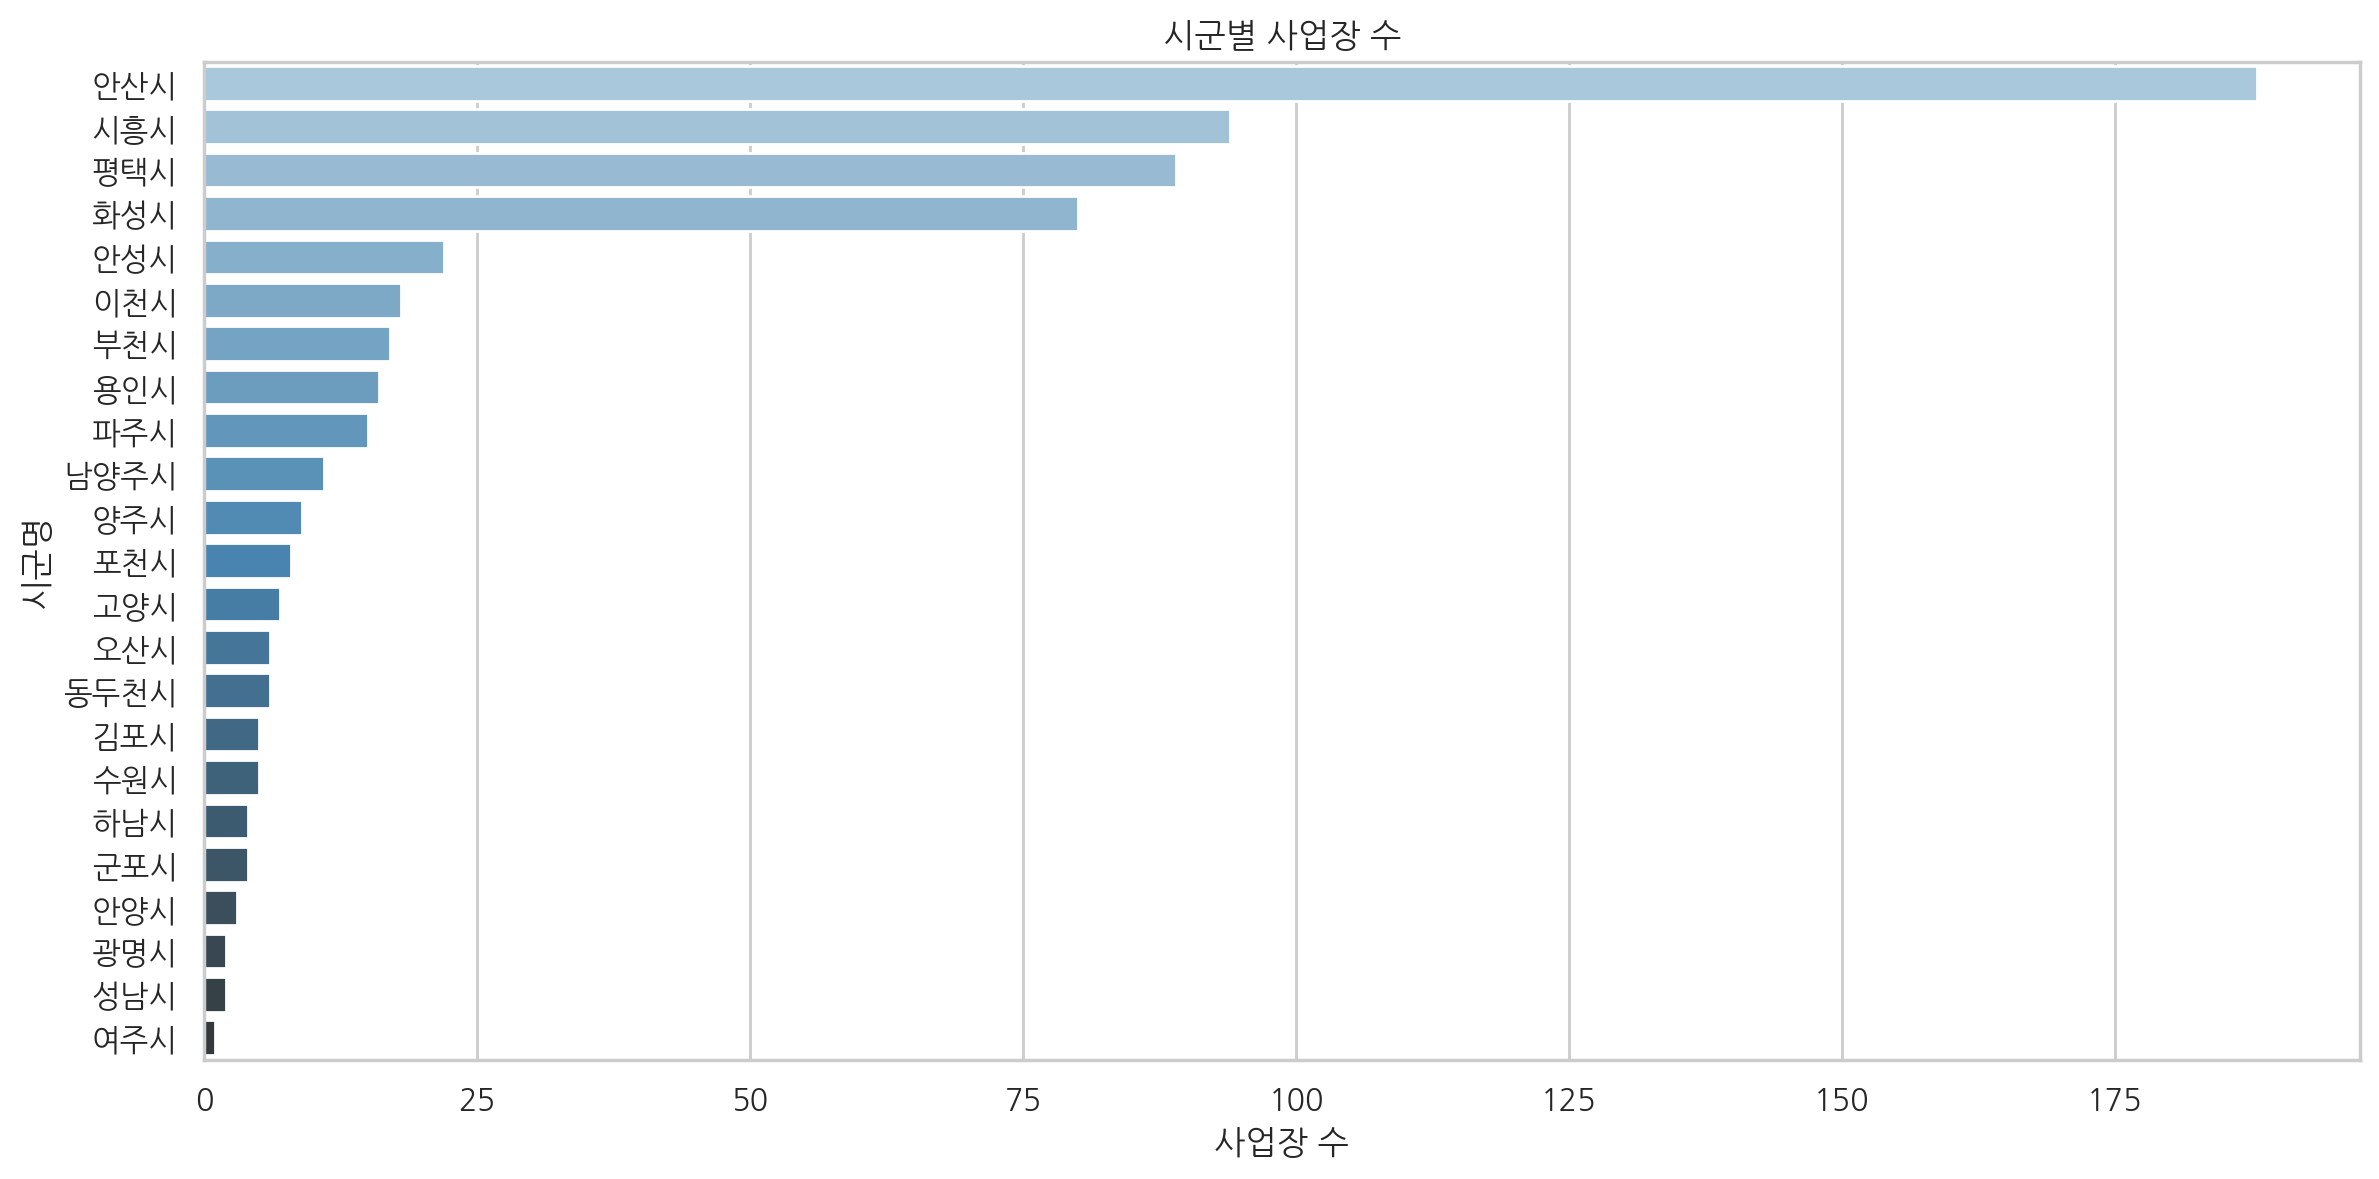

<ipython-input-21-06ec6fcbebc4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chemicals.values, y=top_chemicals.index, palette='Reds_d')


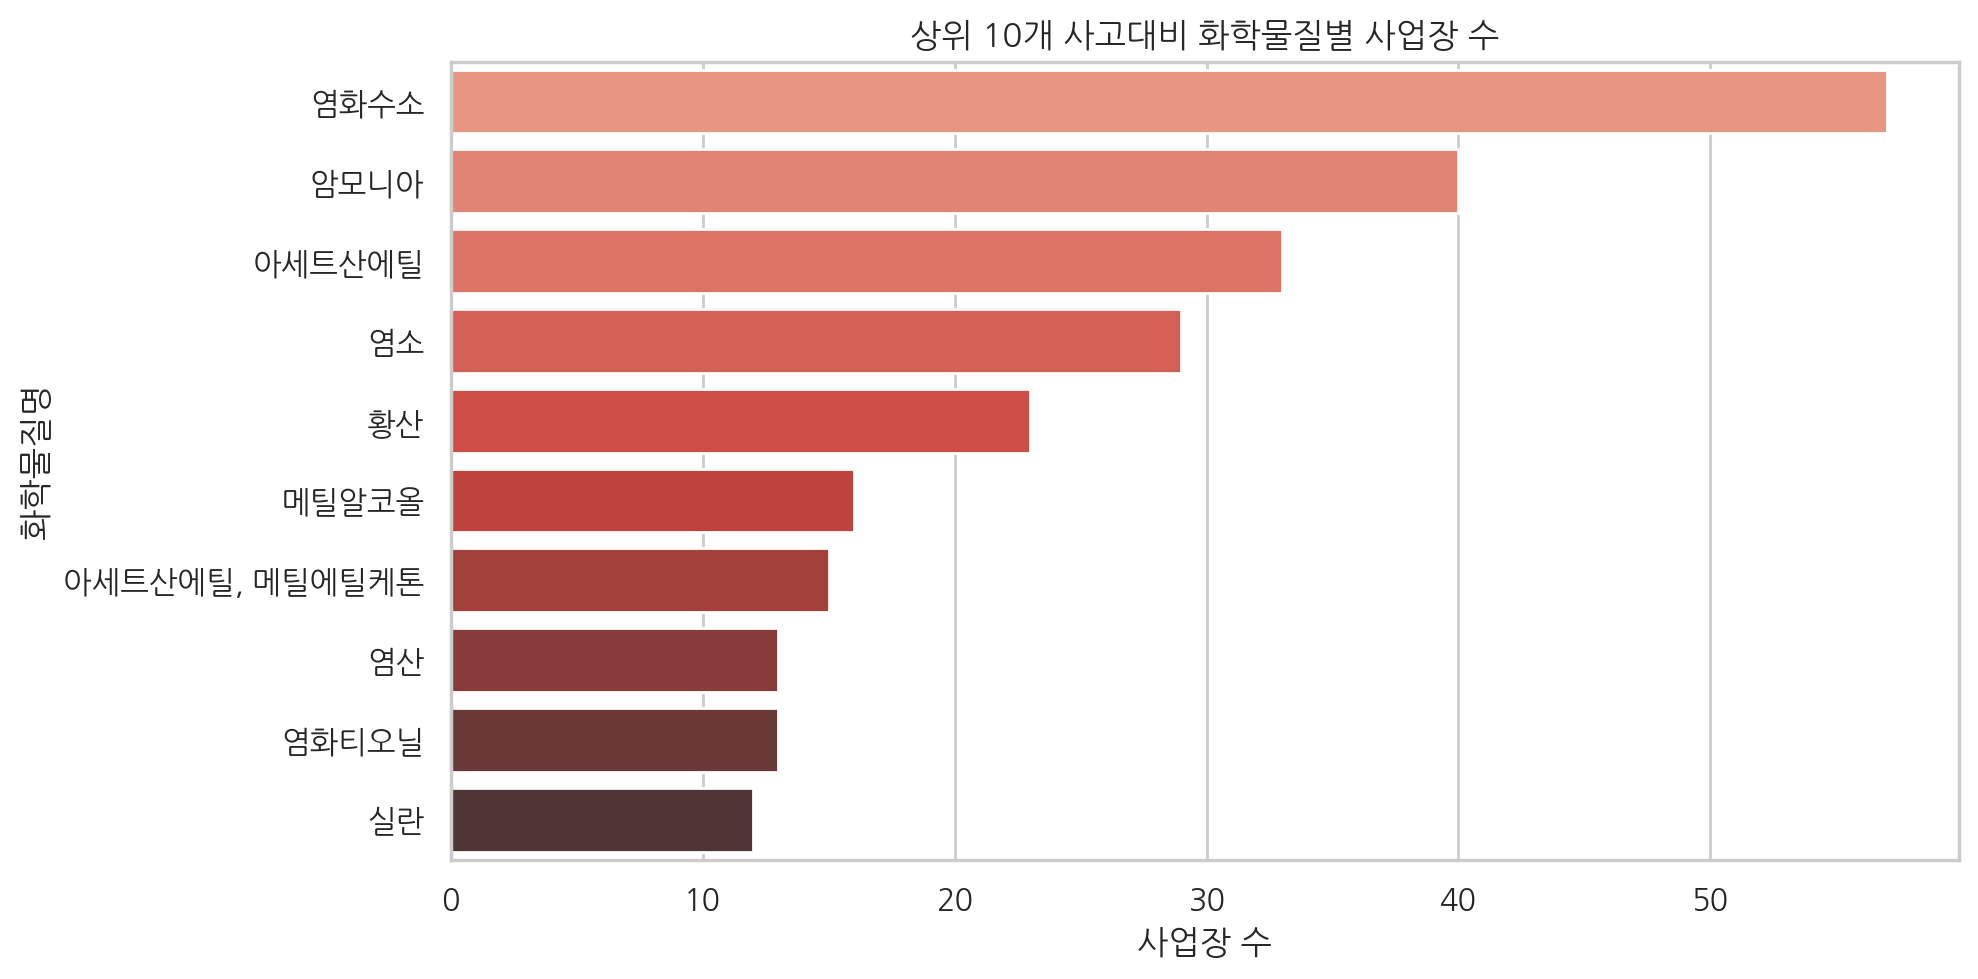

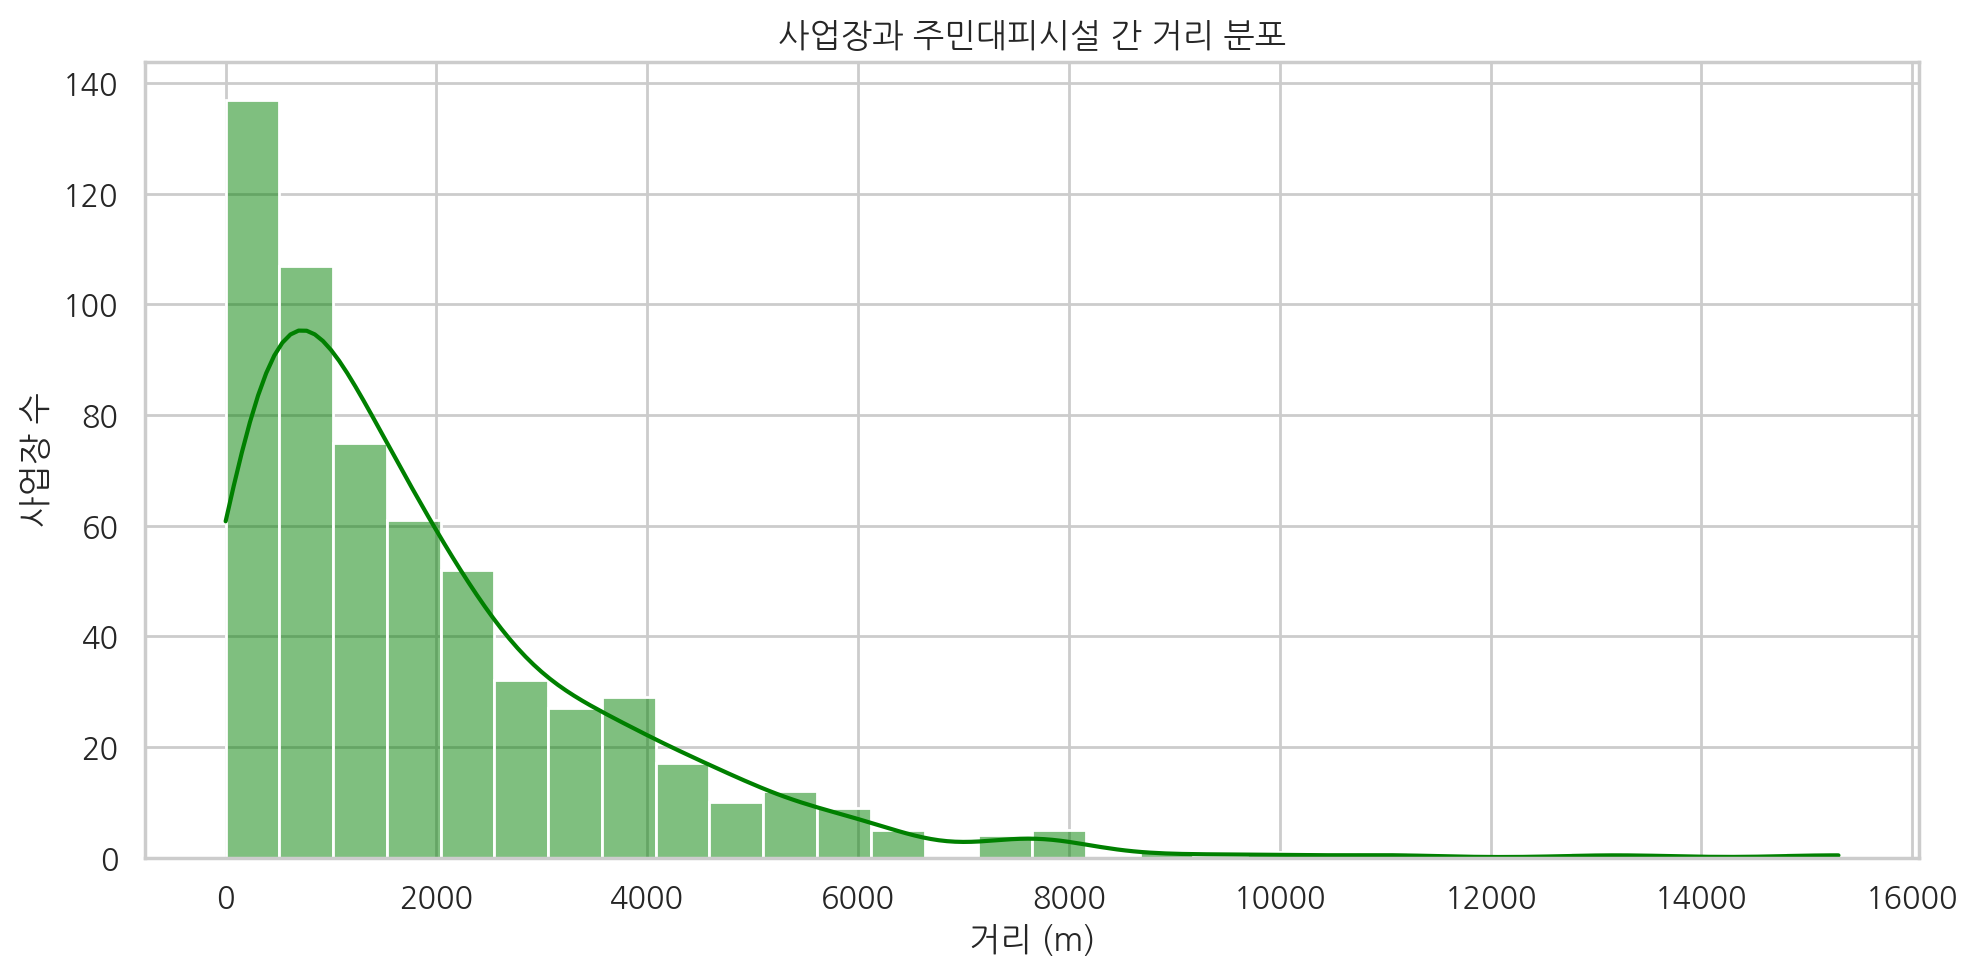

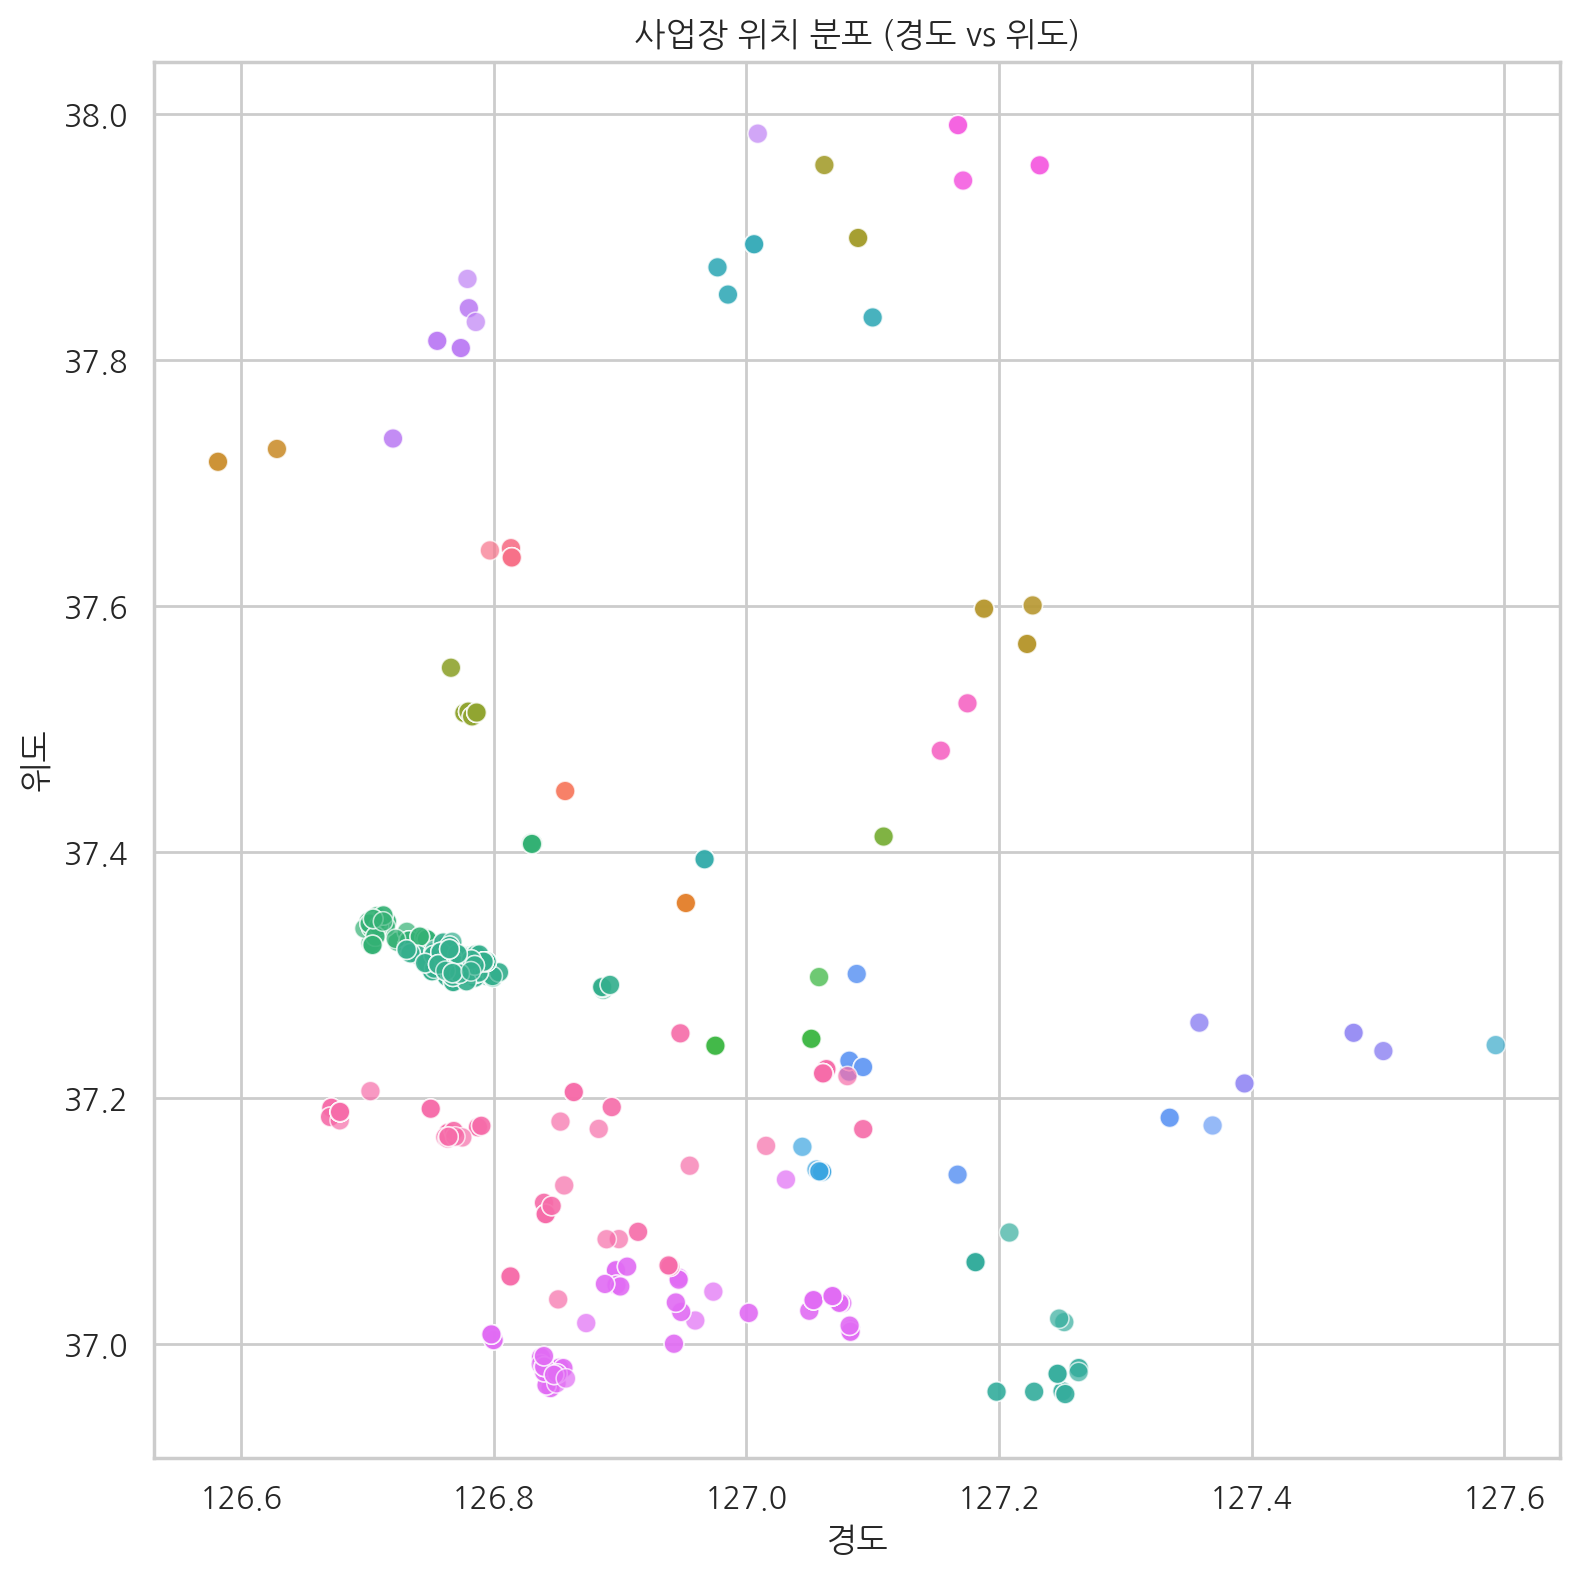

In [24]:
# 시각화 실행
plot_sites_by_region(df)
plot_top_chemicals(df)
plot_shelter_distance(df)
plot_map_scatter(df)